In [1]:
import pandas as pd
import numpy as np
from sklearn.feature_extraction.text import TfidfVectorizer
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
import nltk
from datetime import datetime
from sklearn import preprocessing
from sklearn.cluster import *
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /Users/bruce/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

# Read Data

In [2]:
df = pd.read_csv('../final_data.csv',sep='|')
df


,link,title,author,date,content
0,https://www.cnn.com/middleeast/live-news/israe...,Israel-Hamas war rages as humanitarian crisis ...,cnn,2023-11-21T15:17:02.846Z,A deal to release some hostages in exchange fo...
1,https://www.cnn.com/2023/11/20/world/mosab-abu...,PEN International ‘deeply concerned’ by Palest...,cnn,2023-11-21T12:54:13.029Z,A Palestinian writer and poet who had been con...
2,https://www.cnn.com/2023/11/21/middleeast/isra...,‘Hope is hard to come by’: In the Red Sea reso...,cnn,2023-11-21T06:23:14.252Z,As the red alert alarm sounded in the busy hot...
3,https://www.cnn.com/2023/11/21/world/gaza-host...,Frustrations spill over in Israel as hostage f...,cnn,2023-11-21T04:51:30.424Z,Tensions are boiling over in Israel as frustra...
4,https://www.cnn.com/2023/11/20/politics/pollin...,Polling shows a huge age gap divides the Democ...,cnn,2023-11-20T23:41:49.107Z,President Joe Biden has a problem with the Dem...
...,...,...,...,...,...
1124,https://www.scmp.com/news/world/united-states-...,Israel-Gaza war: Donald Trump slammed for call...,Reuters,2023-10-12T18:06:01.000Z,Israel and the White House on Thursday condemn...
1125,https://www.scmp.com/news/hong-kong/politics/a...,Hong Kong Muslim groups register protest with ...,Lo Hoi-ying,2023-10-12T14:20:33.000Z,Muslim groups in Hong Kong have registered a s...
1126,https://www.scmp.com/news/china/diplomacy/arti...,Israel-Hamas war: mother of kidnapped woman sa...,Sylvie Zhuang,2023-10-12T12:46:56.000Z,"The mother of Noa Argamani, a woman believed t..."
1127,https://www.scmp.com/comment/opinion/article/3...,Israel-Hamas war shows limits of forecasting i...,Nicholas Spiro,2023-10-12T12:30:11.000Z,Boxer Mike Tyson’s famous quote – “Everyone ha...


In [3]:
contents= df['content'].copy().astype(str)
dates = df['date'].copy()

# contents.head(3)
# contentList=[]
# for text in contents:
#     tokens = word_tokenize(text)
#     for index,token in enumerate(tokens):
#         tokens[index]=token.lower()
#     contentList.append(tokens)
    

# print(contentList[0])

# normalize data

def parse_date(date_string):
    try:
        return datetime.strptime(date_string, '%Y-%m-%dT%H:%M:%S.%fZ')
    except Exception as e:
        print (e)
        print("now try '%Y-%m-%dT%H:%M:%S:%fZ'")
        return datetime.strptime(date_string, '%Y-%m-%dT%H:%M:%SZ')

for index,timeString in enumerate(dates):
    timeStr =parse_date(timeString)
    formatted_time = timeStr.strftime('%Y%m%d%H')
    dates[index]=int(formatted_time)
print(dates[0:3])

normalied_dates=(dates-dates.min())/(dates.max()-dates.min())
normalied_dates:np.ndarray = normalied_dates.values.reshape(-1,1) #convert to numpy array
print(normalied_dates[0:3])


time data '2023-11-15T02:59:11Z' does not match format '%Y-%m-%dT%H:%M:%S.%fZ'
now try '%Y-%m-%dT%H:%M:%S:%fZ'
time data '2023-11-21T15:01:29Z' does not match format '%Y-%m-%dT%H:%M:%S.%fZ'
now try '%Y-%m-%dT%H:%M:%S:%fZ'
time data '2023-11-02T20:12:14Z' does not match format '%Y-%m-%dT%H:%M:%S.%fZ'
now try '%Y-%m-%dT%H:%M:%S:%fZ'
time data '2023-10-31T04:23:30Z' does not match format '%Y-%m-%dT%H:%M:%S.%fZ'
now try '%Y-%m-%dT%H:%M:%S:%fZ'
time data '2023-10-30T12:51:13Z' does not match format '%Y-%m-%dT%H:%M:%S.%fZ'
now try '%Y-%m-%dT%H:%M:%S:%fZ'
time data '2023-10-27T22:59:06Z' does not match format '%Y-%m-%dT%H:%M:%S.%fZ'
now try '%Y-%m-%dT%H:%M:%S:%fZ'
time data '2023-10-26T16:32:51Z' does not match format '%Y-%m-%dT%H:%M:%S.%fZ'
now try '%Y-%m-%dT%H:%M:%S:%fZ'
time data '2023-10-26T04:38:00Z' does not match format '%Y-%m-%dT%H:%M:%S.%fZ'
now try '%Y-%m-%dT%H:%M:%S:%fZ'
time data '2023-10-26T01:14:50Z' does not match format '%Y-%m-%dT%H:%M:%S.%fZ'
now try '%Y-%m-%dT%H:%M:%S:%fZ'
t

In [4]:
print(contents)

0       A deal to release some hostages in exchange fo...
1       A Palestinian writer and poet who had been con...
2       As the red alert alarm sounded in the busy hot...
3       Tensions are boiling over in Israel as frustra...
4       President Joe Biden has a problem with the Dem...
                              ...                        
1124    Israel and the White House on Thursday condemn...
1125    Muslim groups in Hong Kong have registered a s...
1126    The mother of Noa Argamani, a woman believed t...
1127    Boxer Mike Tyson’s famous quote – “Everyone ha...
1128    US Secretary of State Antony Blinken on Thursd...
Name: content, Length: 1129, dtype: object


In [5]:
tf_idf=TfidfVectorizer(stop_words=stopwords.words('english'),lowercase=True) # other possible method doc2vec
x_tf_idf = tf_idf.fit_transform(contents)
x_tf_idf=x_tf_idf.todense()
print(x_tf_idf.shape)
print(x_tf_idf[:3])
#normalize the vector
from sklearn.preprocessing import normalize
x_tf_idf=normalize(np.asarray(x_tf_idf), axis=0, norm='max')
print(x_tf_idf.shape)
print(x_tf_idf[:3])

(1129, 7331)
[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]
(1129, 7331)
[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


In [6]:
# merge the feature
X_train = np.hstack((x_tf_idf,normalied_dates))
print(X_train.shape)

(1129, 7332)


In [7]:
# clustering
clustering = MeanShift(bandwidth=1.512,bin_seeding=True,n_jobs=-1).fit(np.asarray(X_train)) # other possbile clustering dbscan, bayes gaussian mixture
print(len(clustering.cluster_centers_))

12


In [8]:
#label text
group=clustering.predict(np.asarray(X_train))
print(group.shape)
df['group']=group
df

(1129,)


,link,title,author,date,content,group
0,https://www.cnn.com/middleeast/live-news/israe...,Israel-Hamas war rages as humanitarian crisis ...,cnn,2023-11-21T15:17:02.846Z,A deal to release some hostages in exchange fo...,11
1,https://www.cnn.com/2023/11/20/world/mosab-abu...,PEN International ‘deeply concerned’ by Palest...,cnn,2023-11-21T12:54:13.029Z,A Palestinian writer and poet who had been con...,11
2,https://www.cnn.com/2023/11/21/middleeast/isra...,‘Hope is hard to come by’: In the Red Sea reso...,cnn,2023-11-21T06:23:14.252Z,As the red alert alarm sounded in the busy hot...,11
3,https://www.cnn.com/2023/11/21/world/gaza-host...,Frustrations spill over in Israel as hostage f...,cnn,2023-11-21T04:51:30.424Z,Tensions are boiling over in Israel as frustra...,11
4,https://www.cnn.com/2023/11/20/politics/pollin...,Polling shows a huge age gap divides the Democ...,cnn,2023-11-20T23:41:49.107Z,President Joe Biden has a problem with the Dem...,11
...,...,...,...,...,...,...
1124,https://www.scmp.com/news/world/united-states-...,Israel-Gaza war: Donald Trump slammed for call...,Reuters,2023-10-12T18:06:01.000Z,Israel and the White House on Thursday condemn...,11
1125,https://www.scmp.com/news/hong-kong/politics/a...,Hong Kong Muslim groups register protest with ...,Lo Hoi-ying,2023-10-12T14:20:33.000Z,Muslim groups in Hong Kong have registered a s...,11
1126,https://www.scmp.com/news/china/diplomacy/arti...,Israel-Hamas war: mother of kidnapped woman sa...,Sylvie Zhuang,2023-10-12T12:46:56.000Z,"The mother of Noa Argamani, a woman believed t...",11
1127,https://www.scmp.com/comment/opinion/article/3...,Israel-Hamas war shows limits of forecasting i...,Nicholas Spiro,2023-10-12T12:30:11.000Z,Boxer Mike Tyson’s famous quote – “Everyone ha...,11


In [9]:
#pick earliest news
groupDates=np.hstack((dates.values.reshape(-1,1),group.reshape(-1,1)))
groupDates=pd.DataFrame(groupDates,columns=["date","group"])
groupDates=groupDates.astype({"date":'Int64',"group":'int'})
result = groupDates.groupby('group')['date'].idxmin()
print(groupDates)
print(result)


            date  group
0     2023112115     11
1     2023112112     11
2     2023112106     11
3     2023112104     11
4     2023112023     11
...          ...    ...
1124  2023101218     11
1125  2023101214     11
1126  2023101212     11
1127  2023101212     11
1128  2023101211     11

[1129 rows x 2 columns]
group
0     461
1     561
2     416
3     743
4     853
5     435
6     709
7     700
8     822
9     431
10    573
11    538
Name: date, dtype: int64


In [10]:
# selected article
df.loc[result.values]

,link,title,author,date,content,group
461,https://www.cnn.com/2023/10/12/us/5-things-to-...,"5 things to know for Oct. 12: Israel, Economy,...",cnn,2023-10-12T10:29:40.809Z,CNN’s 5 Things brings you the news you need to...,0
561,https://abcnews.go.com/International/wireStory...,What is Hamas? The group that rules the Gaza S...,SARAH EL DEEB Associated Press,2023-10-09T17:40:00.000Z,Hamas has ruled the Gaza Strip since 2007,1
416,https://www.cnn.com/2023/10/14/middleeast/hama...,"Who is El Deif, alleged mastermind of the Hama...",cnn,2023-10-14T11:11:50Z,It is with a weird retrospective guilt that I ...,2
743,https://abcnews.go.com/International/wireStory...,War plunged Israel’s agricultural heartlands i...,JULIA FRANKEL Associated Press and MOSHE EDRI...,2023-10-31T09:46:00.000Z,The Israel-Hamas war has plunged Israel’s agri...,3
853,https://abcnews.go.com/International/wireStory...,A contest erupts in Uganda over the tainted le...,RODNEY MUHUMUZA Associated Press,2023-11-13T01:19:00.000Z,Can Idi Amin possibly be rehabilitated,4
435,https://www.cnn.com/2023/10/13/investing/prema...,Investors flock to defensive stocks and safe h...,cnn,2023-10-13T11:46:01Z,The Israel-Hamas war is sending investors in s...,5
709,https://abcnews.go.com/US/wireStory/palestinia...,Palestinians plead 'stop the bombs' at UN meet...,EDITH M. LEDERER Associated Press,2023-10-26T18:51:00.000Z,“Stop the bombs and save lives!”,6
700,https://abcnews.go.com/US/wireStory/israel-ham...,The Israel-Hamas war could threaten already fr...,FATIMA HUSSEIN Associated Press and JOSH BOAK...,2023-10-26T00:15:00.000Z,Economic crises are rippling through the count...,7
822,https://abcnews.go.com/International/wireStory...,"Fights in bread lines, despair in shelters: Wa...",ISABEL DEBRE Associated Press,2023-11-09T12:18:00.000Z,Fistfights break out in bread lines,8
431,https://www.cnn.com/2023/10/13/media/israel-ha...,Explosive claims about the Israel-Hamas war ar...,cnn,2023-10-13T13:04:10Z,The public is enveloped in the fog of war.,9


## Visualize data

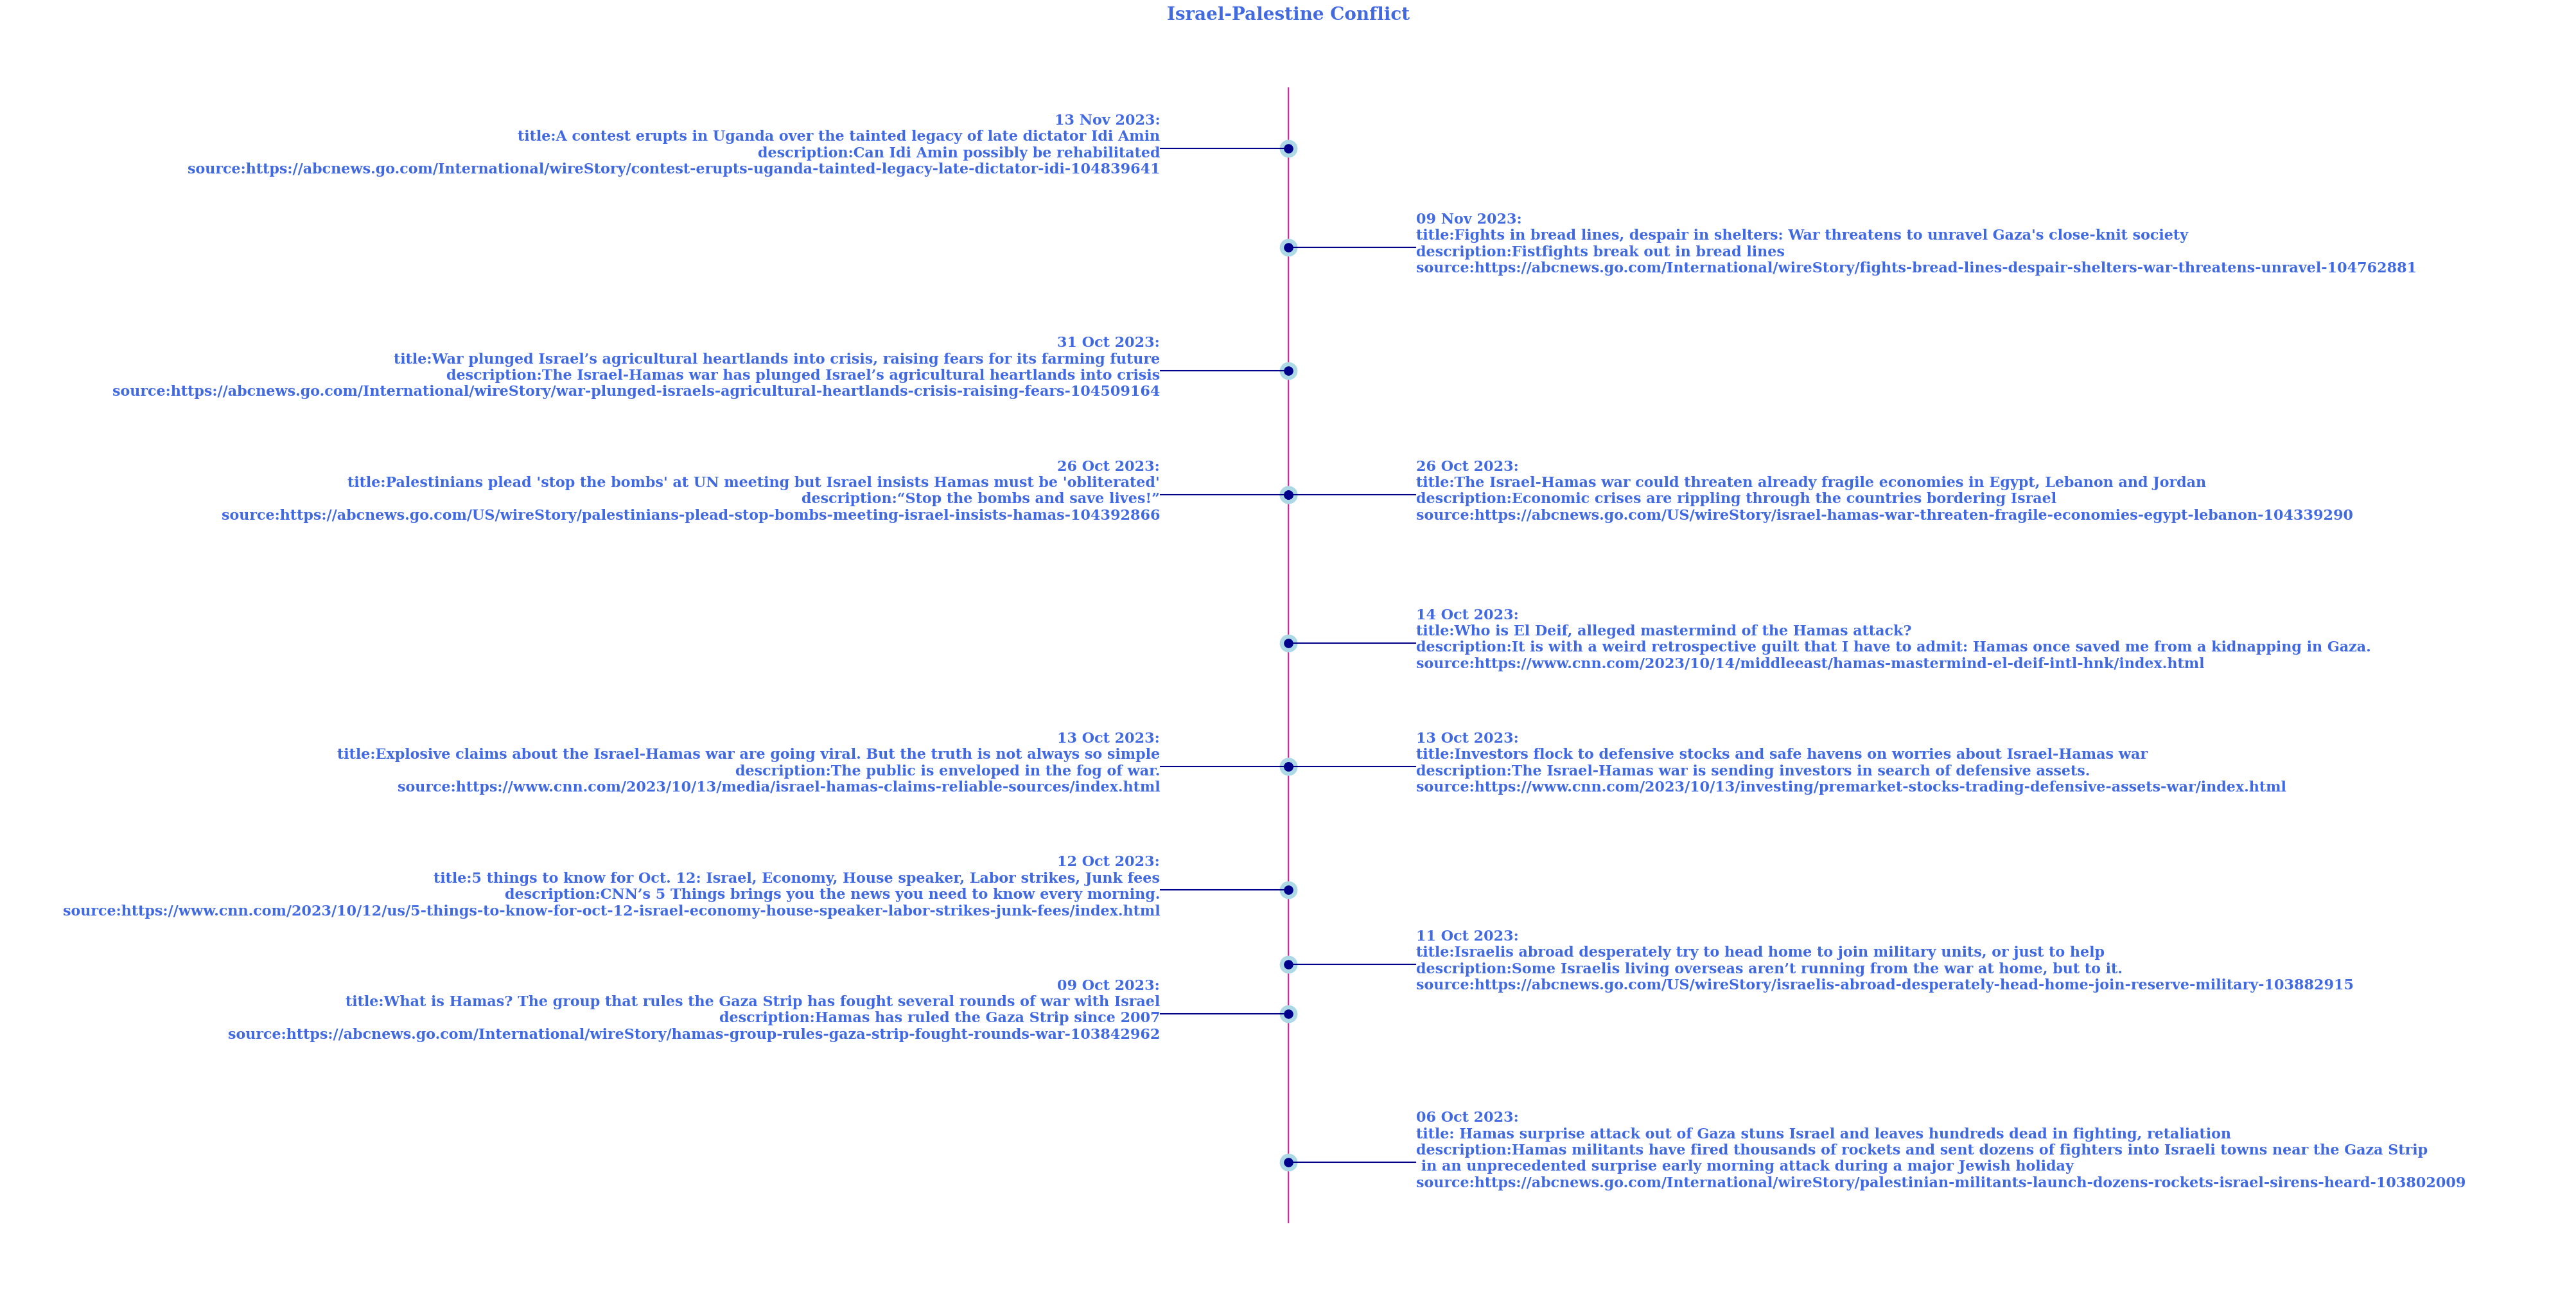

In [23]:
import matplotlib.pyplot as plt
from datetime import date
import numpy as np
from datetime import timedelta
import warnings
warnings.filterwarnings("ignore")

#all the event number
event=[]
for item in result.values:
    event.append(item)
#all the titile,description,source
message=[]
#all the dates
dates=[]
#dic {date:,message:}
dics=[]
i=0

for item in event:
    item=int(item)
    dic={"date": None ,"message": None}
    time=df.loc[item]["date"]
    time=time.split("-")
    temp="title:"+df.loc[item]["title"]+f"\ndescription:"+df.loc[item]["content"]+f"\nsource:"+df.loc[item]["link"]
    dic["message"]=temp
    temp=date(int(time[0]),int(time[1]),int(time[2].split("T")[0]))
    dic["date"]=temp
    dics.append(dic)
        

start_event_date=date(2023,10,6)
start_event_message="title: "+"Hamas surprise attack out of Gaza stuns Israel and leaves hundreds dead in fighting, retaliation"+f"\ndescription:"+"Hamas militants have fired thousands of rockets and sent dozens of fighters into Israeli towns near the Gaza Strip\n"+" in an unprecedented surprise early morning attack during a major Jewish holiday"+f"\nsource:"+"https://abcnews.go.com/International/wireStory/palestinian-militants-launch-dozens-rockets-israel-sirens-heard-103802009"
#sort all the event by time
sorted_dics = sorted(dics, key=lambda x: x['date'])
i=0
for dic in sorted_dics:
    dates.append(dic["date"])
    message.append(dic["message"])
    i=i+1

dates[0]=start_event_date 
message[0]=start_event_message



#set tiemline max,min value
min_date = date(np.min(dates).year , np.min(dates).month-1, np.min(dates).day+22)
max_date = date(np.max(dates).year , np.max(dates).month, np.max(dates).day+5)
 

#creat labels for every event in timeline 
labels = ['{0:%d %b %Y}:\n{1}'.format(d, l) for l, d in zip (message, dates)]


i=0
for item in dates:
    if item.day==14:
        dates[i]=dates[i]+timedelta(days=10)
    if item.day==12:
        dates[i]=dates[i]+timedelta(days=2)
    if item.day==13 and item.month==10:
        dates[i]=dates[i]+timedelta(days=6)
    if item.day==26 or item.day==31:
        dates[i]=dates[i]+timedelta(days=4)
    if item.day==6:
        dates[i]=dates[i]-timedelta(days=3)
    i=i+1

#create figure
fig, ax = plt.subplots(figsize=(40, 20), constrained_layout=True)
#set x scope
_ = ax.set_xlim(-50, 50)
#use min and max date to set y scope
_ = ax.set_ylim(min_date, max_date)
#draw timeline
_ = ax.axvline(0, ymin=0.05, ymax=0.95, c='deeppink', zorder=1)

#draw all the points to show as events 
_ = ax.scatter(np.zeros(len(dates)), dates, s=360, c='lightblue', zorder=2)
_ = ax.scatter(np.zeros(len(dates)), dates, s=90, c='darkblue', zorder=3)

#the distance between lable and point
label_offsets = np.repeat(5.0, len(dates))
label_offsets[1::2] = -5.0
for i, (l, d) in enumerate(zip(labels, dates)):
    d = d - timedelta(days=1)
    #Interleaved display of consecutive events lables
    align = 'right'
    if i % 2 == 0:
        align = 'left'
    text = ax.text(label_offsets[i], d, l, ha=align, fontfamily='serif', fontweight='bold', color='royalblue',fontsize=16)
    text.set_url(l.split("source:")[1])
stems = np.repeat(5.0, len(dates))
stems[1::2] *= -1.0
#draw a line which point to the lable
x = ax.hlines(dates, 0, stems, color='darkblue')#linewidth=10)

# hide lines around chart
for spine in ["left", "top", "right", "bottom"]:
    _ = ax.spines[spine].set_visible(False)
 
_ = ax.set_xticks([])
_ = ax.set_yticks([])
#set the general title
_ = ax.set_title('Israel-Palestine Conflict', fontweight="bold", fontfamily='serif', fontsize=20, 
                 color='royalblue')
fig.canvas.print_figure('image.svg')